<a href="https://colab.research.google.com/github/andersonkstro/Meu-Portfolio/blob/master/Produtividade_Lavoura_Canavial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicar o modelo de Random Forest de aprendizado de máquina para estimar a produtividade de cana-de-açucar

In [1]:
# Montando drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# importando o dataset

df = pd.read_csv('/content/drive/MyDrive/AgroAdvanced/AGRO DS/Introdução a Estatística e Linguagem de Programação/Python/Cases práticos/Case Prático - Predizendo a produtividade da cultura/Aula 19/Dataset.csv')

In [4]:
# Conhecendo as variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PONTO          555 non-null    object 
 1   X (m)          555 non-null    float64
 2   Y (m)          555 non-null    float64
 3   Elevation (m)  555 non-null    float64
 4   Slope (%)      555 non-null    float64
 5   Mill           555 non-null    object 
 6   Season         555 non-null    object 
 7   Clay           555 non-null    float64
 8   Sand           555 non-null    float64
 9   Silt           555 non-null    float64
 10  OM             555 non-null    float64
 11  pH             555 non-null    float64
 12  P              555 non-null    float64
 13  K              555 non-null    float64
 14  Ca             555 non-null    float64
 15  Mg             555 non-null    float64
 16  H+Al           555 non-null    float64
 17  SEB            555 non-null    float64
 18  CEC       

In [5]:
# conhecendo os primeiros dados

df.head()

,PONTO,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
0,C14,236577.416,7645282.633,568.364,13.202,PeM,Plant,401.0,514.0,85.0,...,34.0,49.9,84.2,59.0,4.0,0.13,3.2,18.0,15.1,110.553
1,C15,236585.353,7645331.999,569.248,41.792,PeM,Plant,424.0,480.0,96.0,...,25.0,37.9,62.9,60.0,1.0,0.14,3.3,15.0,16.3,118.320
2,C16,236593.290,7645381.365,570.391,11.223,PeM,Plant,436.5,462.0,101.5,...,34.0,26.4,60.6,43.0,11.0,0.11,3.8,19.0,13.2,120.004
3,C17,236601.227,7645430.731,569.427,2.189,PeM,Plant,471.5,415.0,113.5,...,42.0,24.5,66.8,37.0,24.0,0.15,4.2,24.0,10.8,113.114
4,C18,236609.164,7645480.097,570.934,46.750,PeM,Plant,456.0,419.0,125.0,...,42.0,30.0,72.3,41.0,57.0,0.16,3.6,20.0,9.2,117.427


In [8]:
# Analisando a variável Season

df['Season'].value_counts()

Second Ratoon    224
Third Ratoon     117
Plant            107
First Ratoon     107
Name: Season, dtype: int64

4 anos

In [9]:
# Analisando estatiticamente o conjunto de dados

df.describe()

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,321.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,247518.358050,7.593107e+06,606.632414,11.033668,362.895521,540.025991,97.078494,19.769054,5.293470,27.184550,...,25.132432,36.904032,62.031240,58.737432,14.027181,0.357912,2.640272,33.172432,10.037659,83.035404
std,12681.170274,6.097003e+04,28.723763,7.970232,117.077390,126.214669,18.755261,8.324940,0.318207,38.862354,...,5.878564,11.500654,11.408241,9.838017,10.236846,0.250672,1.435049,23.006837,6.740575,22.285749
min,236531.537000,7.521642e+06,568.364000,0.949000,160.500000,359.000000,56.000000,7.000000,4.400000,3.000000,...,14.000000,11.600000,27.800000,25.000000,0.200000,0.050000,0.600000,1.000000,1.800000,37.121000
25%,236679.634000,7.521778e+06,580.935000,6.968000,241.000000,426.000000,82.500000,12.000000,5.100000,9.000000,...,20.000000,29.650000,55.500000,52.000000,8.000000,0.160000,1.400000,15.000000,4.400000,61.706500
50%,236808.371000,7.644765e+06,592.563000,9.270000,412.500000,499.000000,97.000000,20.000000,5.300000,17.000000,...,25.000000,35.500000,60.900000,58.000000,13.000000,0.240000,2.400000,22.000000,8.200000,87.243000
75%,262276.565000,7.645194e+06,638.700000,12.255000,466.500000,670.000000,111.250000,26.000000,5.500000,35.000000,...,29.000000,42.450000,67.350000,66.000000,17.000000,0.530000,3.700000,52.000000,14.400000,100.958000
max,262827.982000,7.645589e+06,647.300000,62.145000,537.500000,768.000000,142.500000,45.000000,6.100000,599.000000,...,42.000000,137.300000,168.100000,86.000000,68.000000,1.220000,7.100000,130.000000,34.400000,139.713000


In [11]:
# Podemos exportar para o Excel
estatistica = df.describe()
estatistica.to_excel('/content/drive/MyDrive/AgroAdvanced/AGRO DS/Introdução a Estatística e Linguagem de Programação/Python/Cases práticos/Case Prático - Predizendo a produtividade da cultura/estatistica.xlsx')

In [15]:
# Verificando valores ausentes

df.isnull().sum()

PONTO              0
X (m)              0
Y (m)              0
Elevation (m)      0
Slope (%)          0
Mill               0
Season             0
Clay               0
Sand               0
Silt               0
OM                 0
pH                 0
P                  0
K                  0
Ca                 0
Mg                 0
H+Al               0
SEB                0
CEC                0
BS                 0
S                234
B                  0
Cu                 0
Fe                 0
Mn                 0
Yield              0
dtype: int64

In [17]:
# Excluindo variáveis que não serão importantes pro nosso modelo

df = df.drop('S', axis=1)
df = df.drop('PONTO', axis=1) # a variável PONTO não é interessante pra gente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X (m)          555 non-null    float64
 1   Y (m)          555 non-null    float64
 2   Elevation (m)  555 non-null    float64
 3   Slope (%)      555 non-null    float64
 4   Mill           555 non-null    object 
 5   Season         555 non-null    object 
 6   Clay           555 non-null    float64
 7   Sand           555 non-null    float64
 8   Silt           555 non-null    float64
 9   OM             555 non-null    float64
 10  pH             555 non-null    float64
 11  P              555 non-null    float64
 12  K              555 non-null    float64
 13  Ca             555 non-null    float64
 14  Mg             555 non-null    float64
 15  H+Al           555 non-null    float64
 16  SEB            555 non-null    float64
 17  CEC            555 non-null    float64
 18  BS        

In [20]:
# Criando uma variável categórica classificando os tipos de argilas

def clsargila(row):
    if row['Clay'] < 150:
        return 'arenosa'
    if row['Clay'] >= 150 and row['Clay'] < 350:
        return 'media'
    if row['Clay'] >= 350 and row['Clay'] < 600:
        return 'argilosa'
    return 'muito argilosa'

df['clsargila'] = df.apply(lambda row: clsargila(row), axis = 1)

In [23]:
df.head()

,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,OM,...,H+Al,SEB,CEC,BS,B,Cu,Fe,Mn,Yield,clsargila
0,236577.416,7645282.633,568.364,13.202,PeM,Plant,401.0,514.0,85.0,27.0,...,34.0,49.9,84.2,59.0,0.13,3.2,18.0,15.1,110.553,argilosa
1,236585.353,7645331.999,569.248,41.792,PeM,Plant,424.0,480.0,96.0,19.0,...,25.0,37.9,62.9,60.0,0.14,3.3,15.0,16.3,118.320,argilosa
2,236593.290,7645381.365,570.391,11.223,PeM,Plant,436.5,462.0,101.5,24.0,...,34.0,26.4,60.6,43.0,0.11,3.8,19.0,13.2,120.004,argilosa
3,236601.227,7645430.731,569.427,2.189,PeM,Plant,471.5,415.0,113.5,27.0,...,42.0,24.5,66.8,37.0,0.15,4.2,24.0,10.8,113.114,argilosa
4,236609.164,7645480.097,570.934,46.750,PeM,Plant,456.0,419.0,125.0,27.0,...,42.0,30.0,72.3,41.0,0.16,3.6,20.0,9.2,117.427,argilosa


In [22]:
df['clsargila'].value_counts()

argilosa    318
media       237
Name: clsargila, dtype: int64

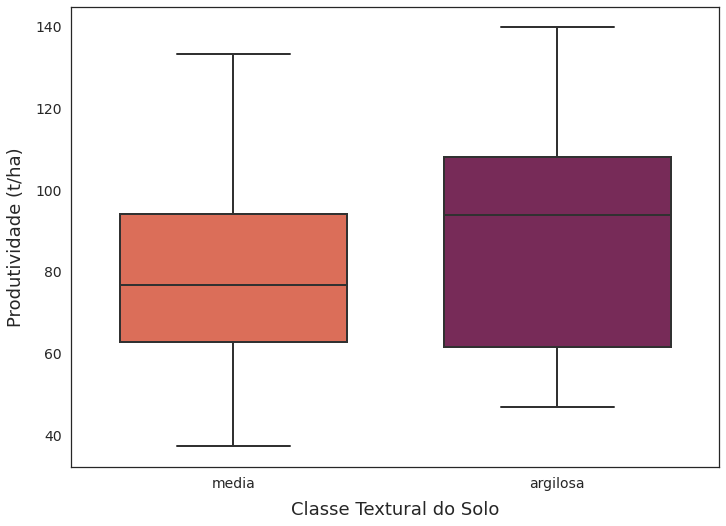

In [30]:
# Avaliando a produtividade em função da textura do solo

plt.subplots(figsize=(12,8))
sns.set(font_scale=1,style='white')
plt.rcParams.update({'font.family': 'Arial'})

boxplot = sns.boxplot(x='clsargila', y='Yield', data=df, palette='rocket_r',
                    order=['media', 'argilosa'], fliersize=3, linewidth=2, width = 0.7)

# boxplot.axes.set_title("Title", fontsize=50)

boxplot.set_xlabel("Classe Textural do Solo", fontsize=18, labelpad=10)
boxplot.set_ylabel("Produtividade (t/ha)", fontsize=18, labelpad=10)
boxplot.tick_params(labelsize=14)
plt.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)

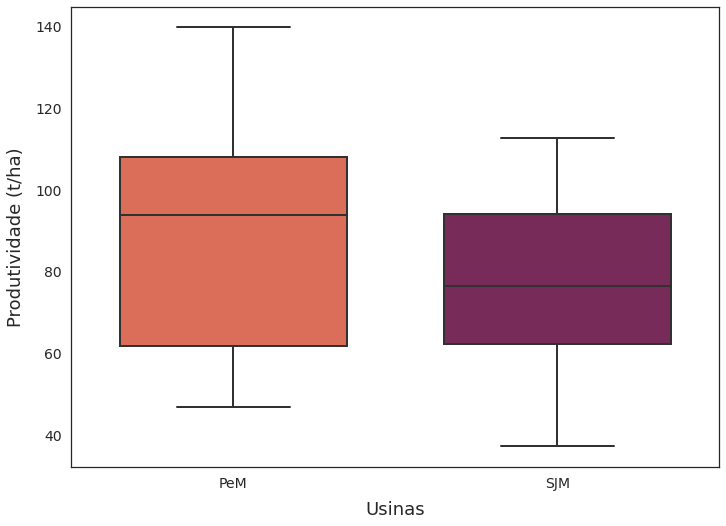

In [32]:
# Avaliando a produtividade em função da textura do solo

plt.subplots(figsize=(12,8))
sns.set(font_scale=1,style='white')
plt.rcParams.update({'font.family': 'Arial'})

boxplot = sns.boxplot(x='Mill', y='Yield', data=df, palette='rocket_r',
                    order=['PeM', 'SJM'], fliersize=3, linewidth=2, width = 0.7)

# boxplot.axes.set_title("Title", fontsize=50)

boxplot.set_xlabel("Usinas", fontsize=18, labelpad=10)
boxplot.set_ylabel("Produtividade (t/ha)", fontsize=18, labelpad=10)
boxplot.tick_params(labelsize=14)
plt.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)

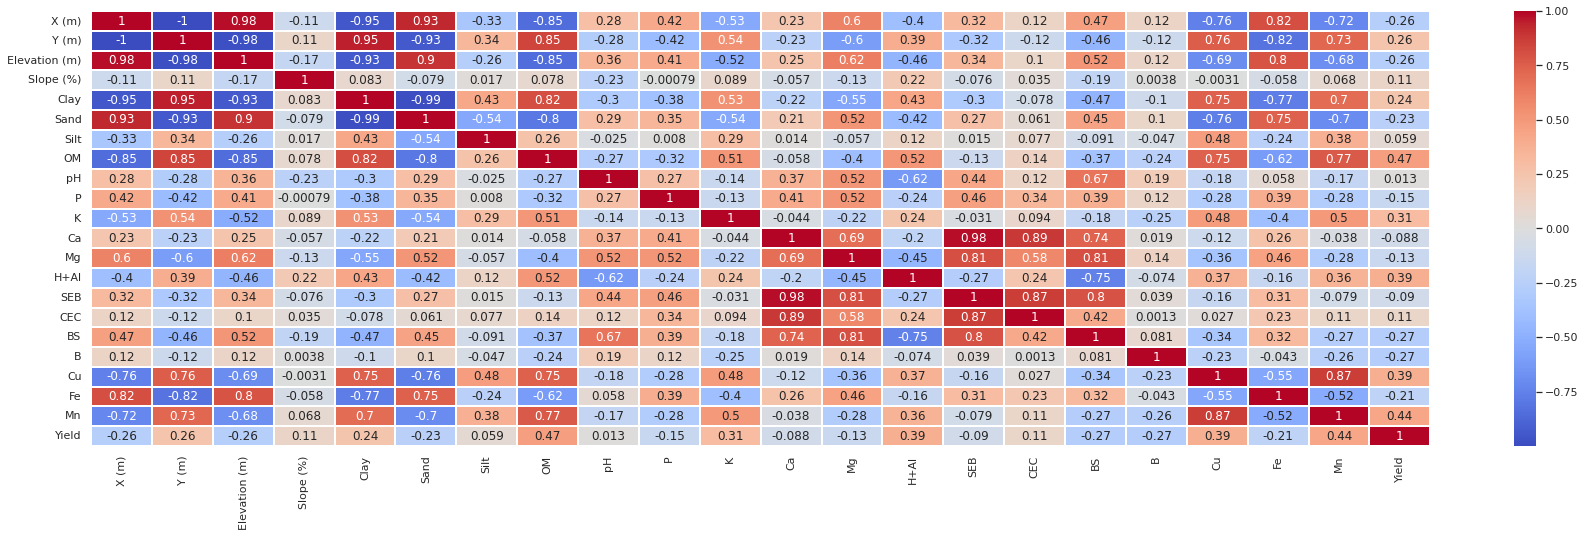

In [35]:
# Construindo uma matriz de correlação

# Mapa de correlação

plt.subplots(figsize=(30,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, linecolor = 'white', linewidths=1)

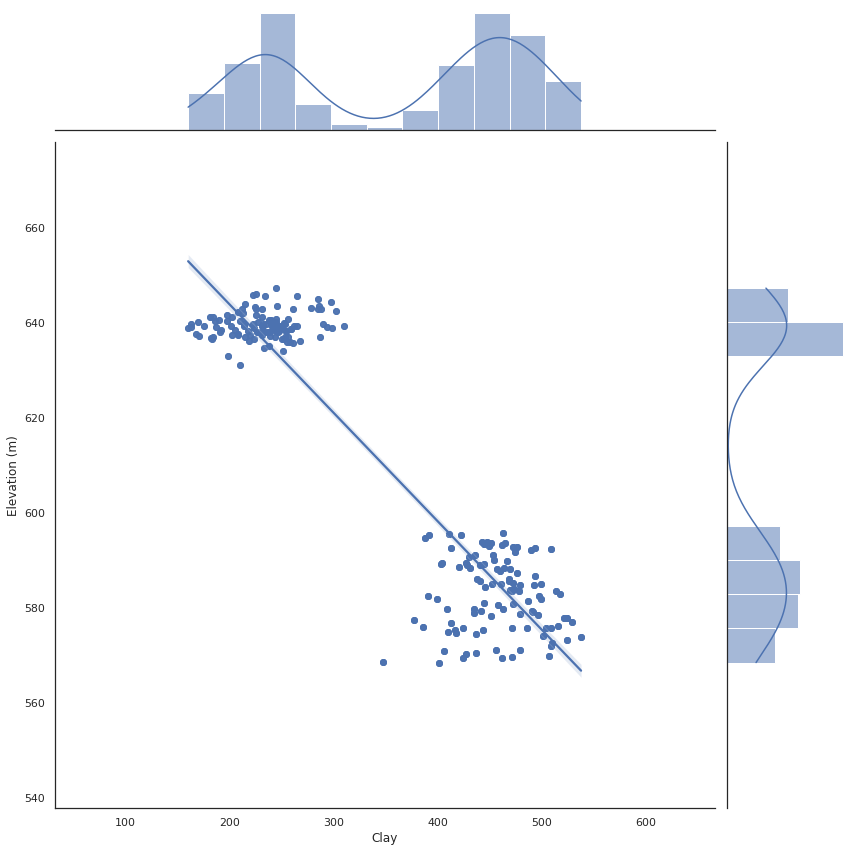

In [38]:
# Gráfico de correlação

sns.set_style('white')
plt.rcParams.update({'font.family': 'Arial'})
jointplot2 = sns.jointplot(x='Clay', y='Elevation (m)', data=df, kind='reg', height=12, ratio=5, space=0.1)
jointplot2.plot_marginals(sns.kdeplot, color='b', shade=True, alpha= .2, legend=False)

# Modelagem

In [41]:
# Importando a biblioteca

from sklearn.model_selection import train_test_split

# Dividindo em treino e teste
# retirando a variável target e incluindo em y
df_x = df.drop(['Yield'], axis=1)
df_y = df['Yield']


df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, train_size=0.7,
                                                                test_size=0.3)



In [45]:
# Checando

print("Test: ", df_x_test.shape)
print("Test: ", df_y_test.shape)

Test:  (167, 24)
Test:  (167,)


In [47]:
# Normalizando/Padronizando as variáveis numéricas

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_x_train[['X (m)', 'Y (m)', 'Elevation (m)', 'Slope (%)','Clay', 'Sand', 'Silt', 'OM', 'pH', 'P', 'K', 'Ca', 'Mg', 'H+Al', 'SEB',
       'CEC', 'BS', 'B', 'Cu', 'Fe', 'Mn']] = scaler.fit_transform(df_x_train[['X (m)', 'Y (m)', 'Elevation (m)', 'Slope (%)','Clay', 'Sand', 'Silt', 'OM', 'pH', 'P', 'K', 'Ca', 'Mg', 'H+Al', 'SEB',
       'CEC', 'BS', 'B', 'Cu', 'Fe', 'Mn']])
df_x_test[['X (m)', 'Y (m)', 'Elevation (m)', 'Slope (%)','Clay', 'Sand', 'Silt', 'OM', 'pH', 'P', 'K', 'Ca', 'Mg', 'H+Al', 'SEB',
       'CEC', 'BS', 'B', 'Cu', 'Fe', 'Mn']] = scaler.fit_transform(df_x_test[['X (m)', 'Y (m)', 'Elevation (m)', 'Slope (%)','Clay', 'Sand', 'Silt', 'OM', 'pH', 'P', 'K', 'Ca', 'Mg', 'H+Al', 'SEB',
       'CEC', 'BS', 'B', 'Cu', 'Fe', 'Mn']])

In [48]:
# Verificando o resultado onde os números variam de 0 a 1

df_x_train.head()

,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,OM,...,Mg,H+Al,SEB,CEC,BS,B,Cu,Fe,Mn,clsargila
191,0.008113,0.993229,0.273563,0.009331,PeM,First Ratoon,0.777188,0.210269,0.526012,0.552632,...,0.136364,0.250000,0.194113,0.175816,0.622951,0.170940,0.343750,0.100775,0.240741,argilosa
412,0.977901,0.000686,1.000000,0.130705,SJM,Second Ratoon,0.224138,0.757946,0.346821,0.078947,...,0.272727,0.428571,0.161496,0.182493,0.491803,0.521368,0.109375,0.534884,0.043210,media
349,0.973856,0.001539,0.903719,0.074536,SJM,Second Ratoon,0.190981,0.789731,0.341040,0.157895,...,0.363636,0.250000,0.143198,0.128338,0.540984,0.350427,0.140625,0.263566,0.120370,media
243,0.003085,0.994218,0.096357,0.128191,PeM,Second Ratoon,0.941645,0.051345,0.560694,0.394737,...,0.318182,0.178571,0.186158,0.153561,0.655738,0.444444,0.281250,0.062016,0.268519,argilosa
89,0.009622,0.995221,0.303347,0.111861,PeM,Plant,0.923077,0.014670,0.815029,0.526316,...,0.272727,0.500000,0.205251,0.236647,0.524590,0.094017,0.609375,0.139535,0.395062,argilosa


In [49]:
# Criando os dummies, ou seja, transgormando as variáveis categóricas em númericas

df_x_train = pd.get_dummies(df_x_train, drop_first=True)
df_x_test = pd.get_dummies(df_x_test, drop_first=True)



In [50]:
# Checando
df_x_train.head()

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,BS,B,Cu,Fe,Mn,Mill_SJM,Season_Plant,Season_Second Ratoon,Season_Third Ratoon,clsargila_media
191,0.008113,0.993229,0.273563,0.009331,0.777188,0.210269,0.526012,0.552632,0.823529,0.015054,...,0.622951,0.170940,0.343750,0.100775,0.240741,0,0,0,0,0
412,0.977901,0.000686,1.000000,0.130705,0.224138,0.757946,0.346821,0.078947,0.470588,0.075269,...,0.491803,0.521368,0.109375,0.534884,0.043210,1,0,1,0,1
349,0.973856,0.001539,0.903719,0.074536,0.190981,0.789731,0.341040,0.157895,0.647059,0.064516,...,0.540984,0.350427,0.140625,0.263566,0.120370,1,0,1,0,1
243,0.003085,0.994218,0.096357,0.128191,0.941645,0.051345,0.560694,0.394737,0.352941,0.000000,...,0.655738,0.444444,0.281250,0.062016,0.268519,0,0,1,0,0
89,0.009622,0.995221,0.303347,0.111861,0.923077,0.014670,0.815029,0.526316,0.411765,0.004301,...,0.524590,0.094017,0.609375,0.139535,0.395062,0,1,0,0,0


In [51]:
# Aplicando o Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(df_x_train, df_y_train)


RandomForestRegressor()

In [52]:
# Predizendo na base de Test
rfr_pred = rfr.predict(df_x_test)

In [53]:
# Avaliando as métricas (R2)

from sklearn.metrics import r2_score

r2_score(df_y_test, rfr_pred)

0.8778861658703567

In [59]:
#Avaliando as métricas (RMSE)

from sklearn.metrics import mean_squared_error

mean_squared_error(df_y_test, rfr_pred, squared=False)  # Squared => If True returns MSE value, if False returns RMSE value

7.7970718461239725

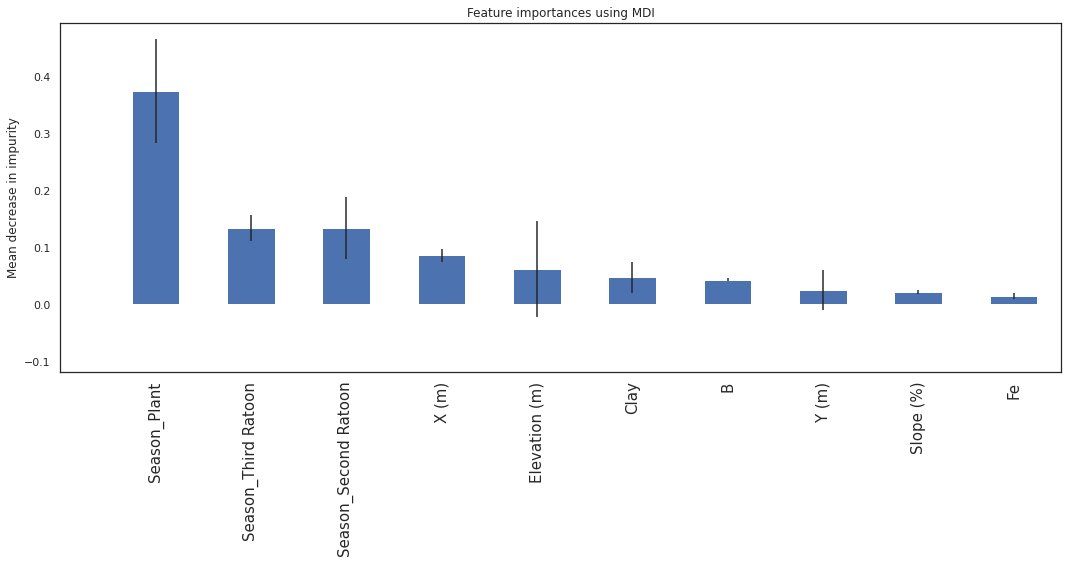

In [60]:
# AValiando a importâncias das Variáveis

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)

rfc_importances = pd.Series(importances, index=df_x_train.columns)
imp = rfc_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))

imp.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.xticks(fontsize=15)

plt.xlim([-1, 9.5])

fig.tight_layout()

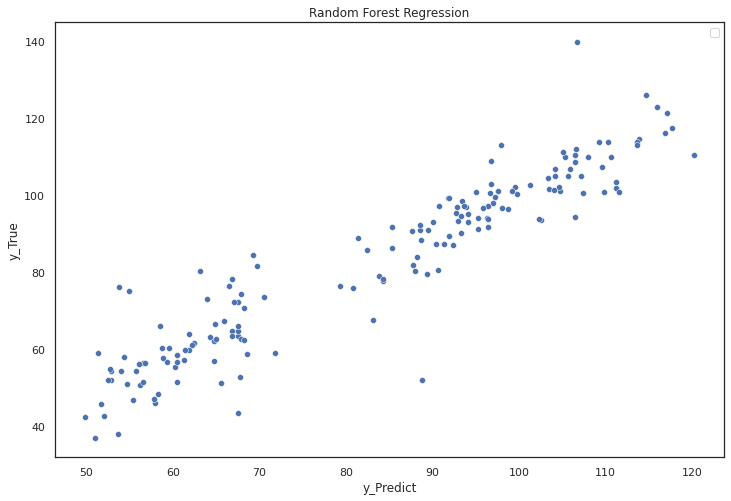

In [61]:
# Gráfico Predito versus Real

lw = 1.5

fig, ax = plt.subplots(1, 1,figsize=(12, 8))

sns.scatterplot(x=rfr_pred, y=df_y_test, data=df_x_test)

plt.xlabel('y_Predict')
plt.ylabel('y_True')
plt.title('Random Forest Regression')

plt.legend()

plt.show()

In [62]:
#Ajustando Hiperparâmetros

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True, False], 
              'max_depth': [10, 50, 100, None], 
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [100, 500, 1000, 1500]}

In [63]:
grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3)

In [64]:
grid.fit(df_x_train, df_y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500, 1000, 1500]})

In [65]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 500}

In [66]:
grid_predictions = grid.predict(df_x_test)

In [71]:
print('Erro modelo anerior:', r2_score(df_y_test, rfr_pred))
print("Erro modelo hiperparâmetro:", r2_score(df_y_test, grid_predictions))

Erro modelo anerior: 0.8778861658703567
Erro modelo hiperparâmetro: 0.8847564600049366


In [73]:
print("Erro medio ao quadrado antigo: ", mean_squared_error(df_y_test, rfr_pred, squared=False))
print("Erro medio ao quadrado com hiperparâmetro:", mean_squared_error(df_y_test, grid_predictions, squared=False))

Erro medio ao quadrado antigo:  7.7970718461239725
Erro medio ao quadrado com hiperparâmetro: 7.574559779619062
